<a href="https://colab.research.google.com/github/adityapatil4141/Health-Insurance-Cross-Sell-Prediction/blob/main/Health_Insurance_Cross_Sell_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 - Aditya Patil **

# **Project Summary -**

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue. In Exploratory Data Analysis, we categorized the Age as YoungAge, MiddleAge, OldAge.Then we categorized Region_Code and Policy_Sales_Channel to extract some valuable information from these features. We explored the independent features using some plots. Then the feature selection we used ExtraTreesClassifier and then the train test split. For Model prediction, we used supervised machine learning algorithms like logistic regression, Random forest classifierand XGB Classifier. Then comparing all the models and seeing which model gives the best results.

# **GitHub Link -**

https://github.com/adityapatil4141/Health-Insurance-Cross-Sell-Prediction

# **Problem Statement**


** The task is to develop a machine learning model that predicts whether a policyholder from the past year would be interested in obtaining vehicle insurance from the company. The dataset includes information about demographics (gender, age, region code type), details about the vehicle (vehicle age, damage), and policy-related details (premium, sourcing channel).**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
colors = sns.color_palette(palette='Set1')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/work files /Health Insurance Cross Sell Prediction/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

### Dataset First View

In [4]:
# Dataset First Look
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(381109, 12)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

<Axes: >

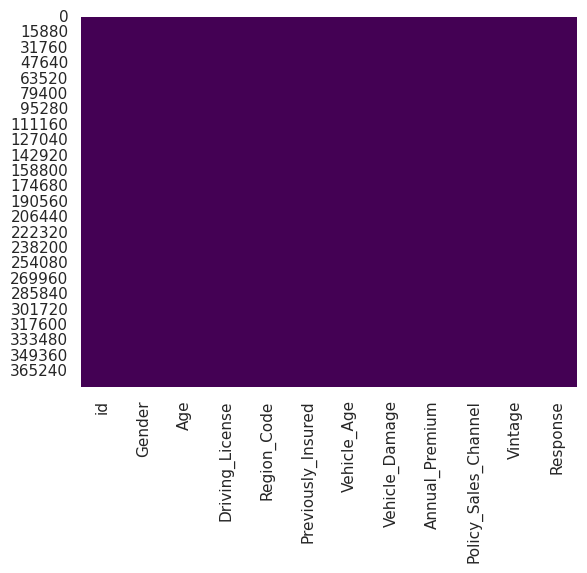

In [9]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cmap='viridis',cbar=False)

### What did you know about your dataset?

--> There are total 381109 rows and 12 columns.

--> There are no null values in the dataset.

--> There are no duplicate values in the dataset.


## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe()

id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25%              0.000000    24405.000000             29.000000   
50%              0.000000    31669.000000            133.000000   
75%              1.000000    39400.000000            152.000000   
max              1.000000   540165.000000            163.000000   

             Vintage       Response  
count  381109.000000  381109.000000  
mean      154.347397       0.122563  
std        83.671304       0.327936  
min        10.000000       0.000000  
25%        82.000000       0.000000  
50%       154.000000       0.000000  
75%       227.000000       0.000000  
max       299.000000       1.000000

### Variables Description

There are in total 381109 rows and 12 columns in the dataset, Dataset have no null values or no duplicate values.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
print("Unique values in Age column")
print(df['Age'].unique())
print("#"*50)
print("Unique values in Driving_License column")
print(df['Driving_License'].unique())
print("#"*50)
print("Unique values in Region_Code column")
print(df['Region_Code'].unique())
print("#"*50)
print("Unique values in Previously_Insured column")
print(df['Previously_Insured'].unique())
print("#"*50)
print("Unique values in Annual_Premium column")
print(df['Annual_Premium'].unique())
print("#"*50)
print("Unique values in Policy_Sales_Channel column")
print(df['Policy_Sales_Channel'].unique())
print("#"*50)
print("Unique values in Vintage column")
print(df['Vintage'].unique())
print("#"*50)
print("Unique values in Response column")
print(df['Response'].unique())
print("#"*50)

Unique values in Age column
[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]
##################################################
Unique values in Driving_License column
[1 0]
##################################################
Unique values in Region_Code column
[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]
##################################################
Unique values in Previously_Insured column
[0 1]
##################################################
Unique values in Annual_Premium column
[ 40454.  33536.  38294. ...  20706. 101664.  69845.]
##################################################
Unique values in Policy_Sales_Channel column
[ 26. 152. 160. 124.  14.  13.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
df = df.drop(columns='id')

In [14]:
df.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0    Male   44                1         28.0                   0   > 2 Years   
1    Male   76                1          3.0                   0    1-2 Year   
2    Male   47                1         28.0                   0   > 2 Years   
3    Male   21                1         11.0                   1    < 1 Year   
4  Female   29                1         41.0                   1    < 1 Year   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0            Yes         40454.0                  26.0      217         1  
1             No         33536.0                  26.0      183         0  
2            Yes         38294.0                  26.0       27         1  
3             No         28619.0                 152.0      203         0  
4             No         27496.0                 152.0       39         0

### What all manipulations have you done and insights you found?

As there are no null value or no duplicate values there is no need to do any extra things.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<ipython-input-15-c87f76e2ef70>:5: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.countplot(data=df,x=df['Gender'],palette=colors,hue='Gender')


<Axes: xlabel='Gender', ylabel='count'>

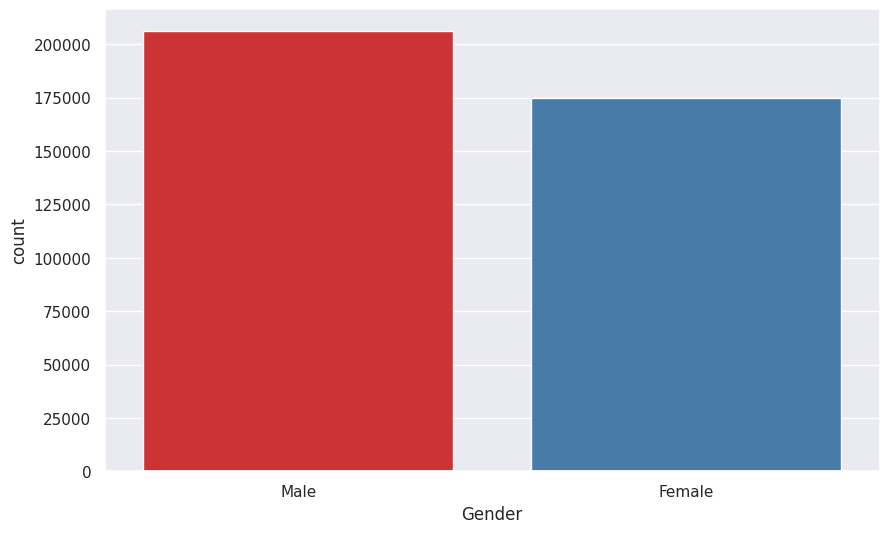

In [15]:
# Chart - 1 visualization code
# Countplot:
# How many genders and their count:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x=df['Gender'],palette=colors,hue='Gender')

In [16]:
# Numeric presentation of same:
df['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

##### 1. Why did you pick the specific chart?

Countplot helps to count values in a column.

##### 2. What is/are the insight(s) found from the chart?

Number of males are more compared to female.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This shows us that most policyholders are male.

#### Chart - 2

<ipython-input-17-6775ca05fd8c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=df['Age'],palette=colors)
<ipython-input-17-6775ca05fd8c>:5: UserWarning: 
The palette list has fewer values (9) than needed (66) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df,x=df['Age'],palette=colors)


<Axes: xlabel='Age', ylabel='count'>

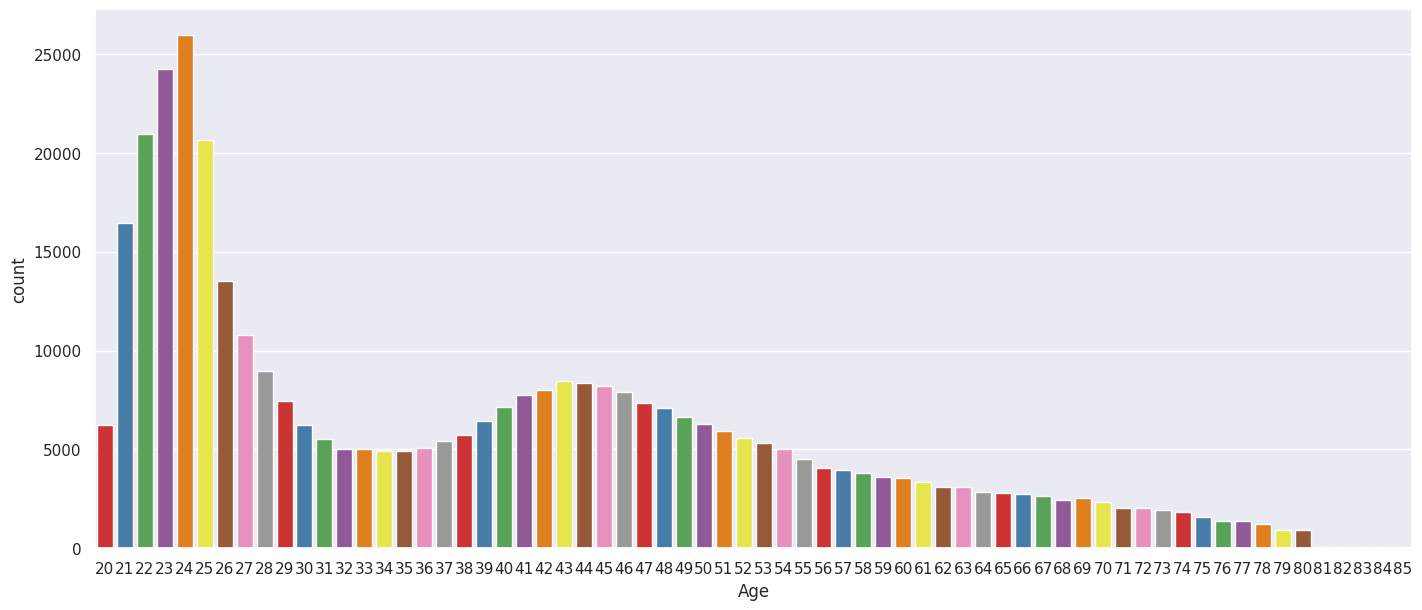

In [17]:
# Chart - 2 visualization code
# Countplot:
# Age distribution:
plt.figure(figsize=(17,7))
sns.countplot(data=df,x=df['Age'],palette=colors)

##### 1. Why did you pick the specific chart?

Countplot helps to count values in a column.

##### 2. What is/are the insight(s) found from the chart?

Most policy holders lies in age group of 21-27 and 40-48

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By getting information about customers age we can target them easily.

#### Chart - 3

<ipython-input-18-e9a7bdb3c764>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Driving_License',palette=colors)
<ipython-input-18-e9a7bdb3c764>:5: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.countplot(data=df,x='Driving_License',palette=colors)


<Axes: xlabel='Driving_License', ylabel='count'>

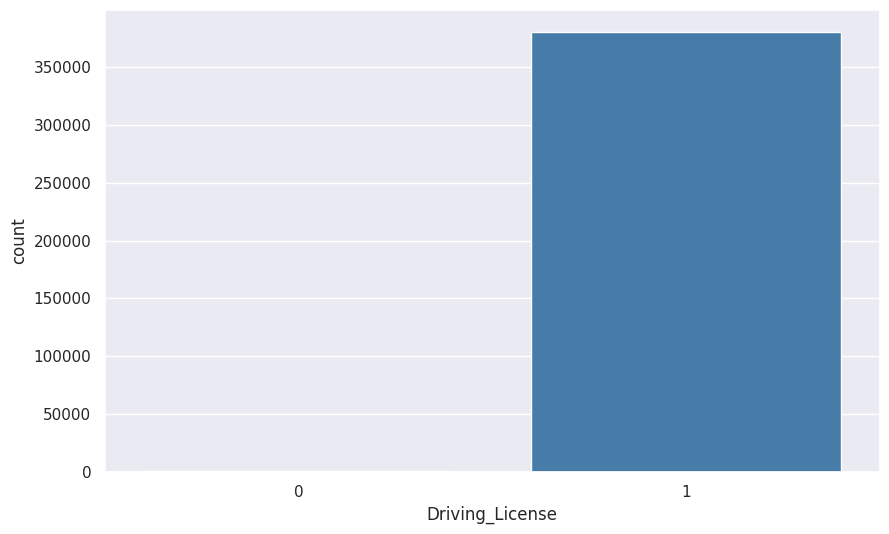

In [18]:
# Chart - 3 visualization code
# Countplot:
# How many peoples have driving license:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Driving_License',palette=colors)

In [21]:
# Numerical presentation of same:
dl_count=df['Driving_License'].value_counts()

([<matplotlib.patches.Wedge at 0x7e0bbf646680>,
 [Text(-1.0999753580016838, 0.007362865547323239, '1'),
  Text(1.099975357920899, -0.007362877616127189, '0')],
 [Text(-0.5999865589100092, 0.00401610848035813, '99.79'),
  Text(0.5999865588659449, -0.004016115063342102, '0.21')])

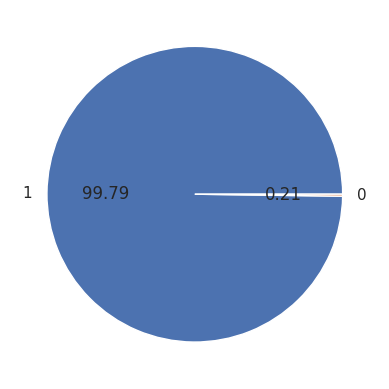

In [23]:
# Pie chart to get how many percent of people has driving license and how many do not have a friving license:
plt.pie(dl_count,autopct='%.2f',labels=dl_count.index)

##### 1. Why did you pick the specific chart?

Countplot helps to count values in a column.

##### 2. What is/are the insight(s) found from the chart?

Most people have driving license, people without driving license are very few.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

probability is people without driving license may not have a vehicle and so they may not be interested in Policy.

#### Chart - 4

<ipython-input-24-232b6c0c16ae>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=df['Previously_Insured'],palette=colors)
<ipython-input-24-232b6c0c16ae>:4: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.countplot(data=df,x=df['Previously_Insured'],palette=colors)


<Axes: xlabel='Previously_Insured', ylabel='count'>

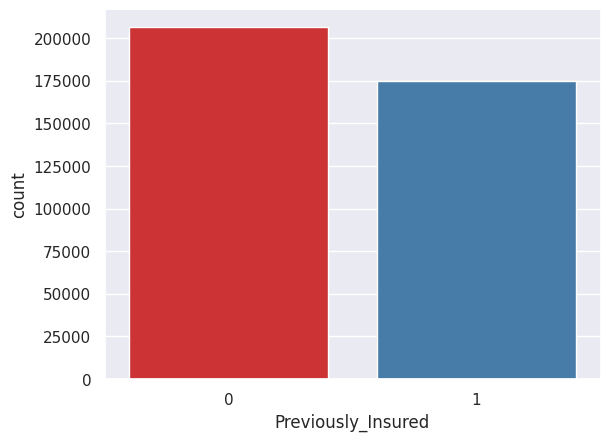

In [24]:
# Chart - 4 visualization code
# Countplot:
# How may people are previously insured
sns.countplot(data=df,x=df['Previously_Insured'],palette=colors)

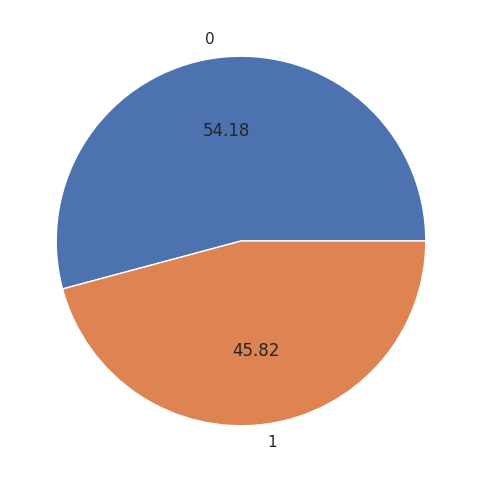

In [25]:
plt.figure(figsize=(10,6))
pi_count = df['Previously_Insured'].value_counts()
plt.pie(pi_count,autopct='%.2f',labels=pi_count.index)
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart can show how many percent of people are insure and not insured

##### 2. What is/are the insight(s) found from the chart?

54.18 % people are not insured and only 45.82 % people are insured.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

<ipython-input-26-902639c46112>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=df['Vehicle_Age'],palette=colors)
<ipython-input-26-902639c46112>:5: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.countplot(data=df,x=df['Vehicle_Age'],palette=colors)


<Axes: xlabel='Vehicle_Age', ylabel='count'>

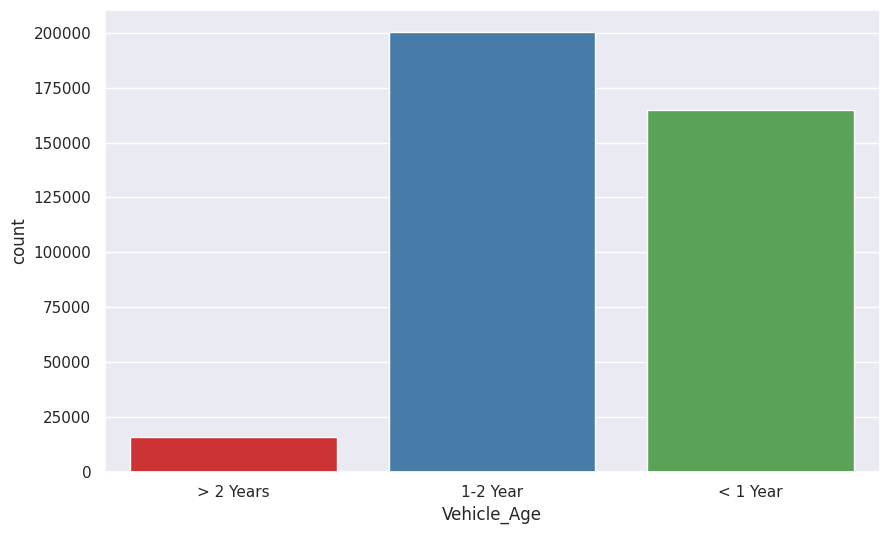

In [26]:
# Chart - 5 visualization code
# Countplot:
# See count of vehicle age:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x=df['Vehicle_Age'],palette=colors)

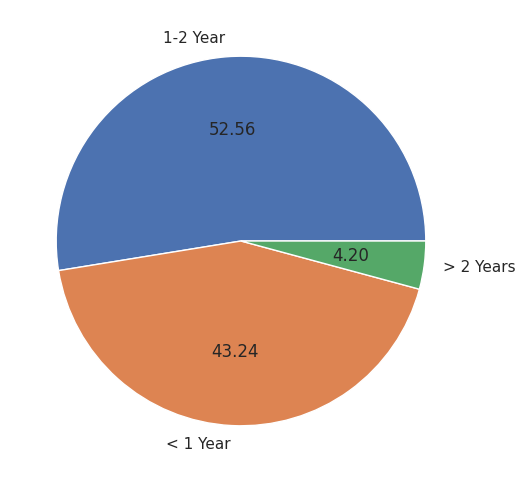

In [27]:
v_age_count = df['Vehicle_Age'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(v_age_count,autopct='%.2f',labels=v_age_count.index)
plt.show()

##### 1. Why did you pick the specific chart?

check percentage and count of vehicle age.

##### 2. What is/are the insight(s) found from the chart?

52.56% vehicle are of age 1-2 years and 43.24 % of vehicles are less than a year old, whereas 4.20% vehicles are above 2 years age.

#### Chart - 6

<ipython-input-28-8add3d5d6ac6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=df['Vehicle_Damage'],palette=colors)
<ipython-input-28-8add3d5d6ac6>:5: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.countplot(data=df,x=df['Vehicle_Damage'],palette=colors)


<Axes: xlabel='Vehicle_Damage', ylabel='count'>

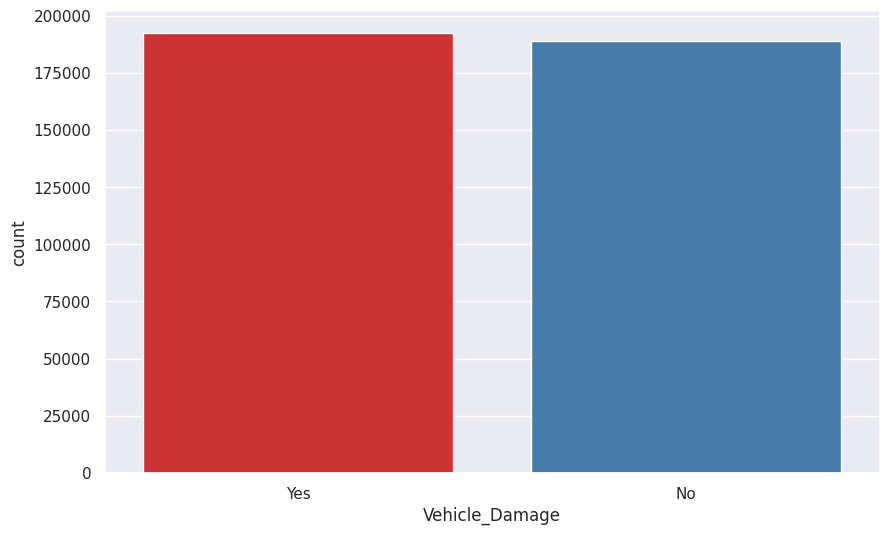

In [28]:
# Chart - 6 visualization code
# Countplot:
# How many vehicles are damaged:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x=df['Vehicle_Damage'],palette=colors)

([<matplotlib.patches.Wedge at 0x7e0bb84615a0>,
 [Text(-0.01685150167390648, 1.0998709137400327, 'Yes'),
  Text(0.0168515016739061, -1.0998709137400327, 'No')],
 [Text(-0.00919172818576717, 0.5999295893127451, '50.49'),
  Text(0.009191728185766962, -0.5999295893127451, '49.51')])

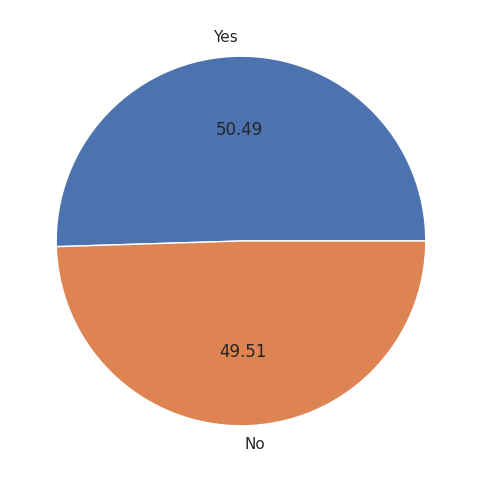

In [29]:
v_damage = df['Vehicle_Damage'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(v_damage,autopct='%.2f',labels=v_damage.index)


##### 1. Why did you pick the specific chart?

To see how many vehicles were damaged.

##### 2. What is/are the insight(s) found from the chart?

50.49 % vehicles are damaged and 49.51 % vehicles are not damaged.

#### Chart - 7

<Axes: xlabel='Response', ylabel='count'>

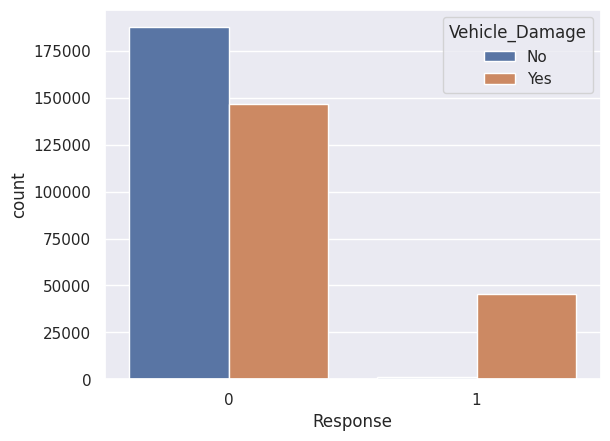

In [30]:
# Countplot:
# Peoples response on basis of vehicle damage:
sns.countplot(data=df,x=df['Response'], hue='Vehicle_Damage')

##### 1. Why did you pick the specific chart?

Countplot helps to count values in a column.

##### 2. What is/are the insight(s) found from the chart?

We can see that People with no vehicle damage are not interested in getting vehicle insurance followed by people with vehicle damage are also not interested in insurance as compared to people interested in insurance with vehicle damage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This will help to understand what type of people are interested in buying insurance.

#### Chart - 8

<Axes: xlabel='Previously_Insured', ylabel='count'>

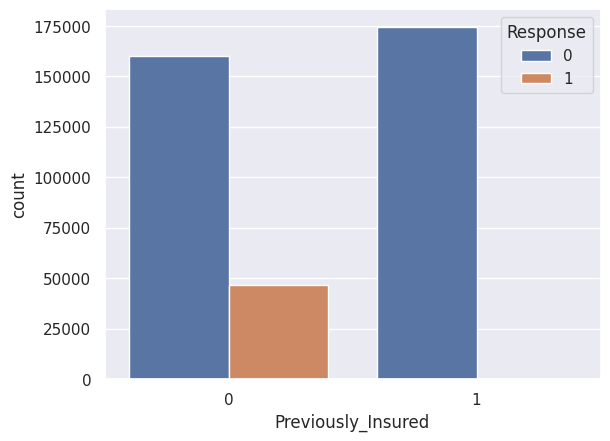

In [31]:
# Chart - 8 visualization code
df.head()
# Perviously insured peoples and their response:
sns.countplot(data=df,x= 'Previously_Insured',hue='Response')

##### 2. What is/are the insight(s) found from the chart?

Maximum are those peoples who are previously insured but are not interested in vehicle insurance, followed by no. of peoples who re not previously insured and anre not interested in vehicle insurance, There are few people who are not previously insured but are interested in vehicle insurance.

#### Chart - 9

In [32]:
# Chart - 9 visualization code

In [33]:
# Top 10 region code that have highest no. of interested people
top_regions =df.groupby(df['Region_Code'])['Response'].sum().sort_values(ascending=False).reset_index().head(10)
top_regions

Region_Code  Response
0         28.0     19917
1          8.0      3257
2         41.0      2224
3         46.0      2032
4         29.0      1365
5          3.0      1181
6         11.0      1041
7         15.0       958
8         30.0       900
9         35.0       865

<Axes: xlabel='Region_Code', ylabel='Response'>

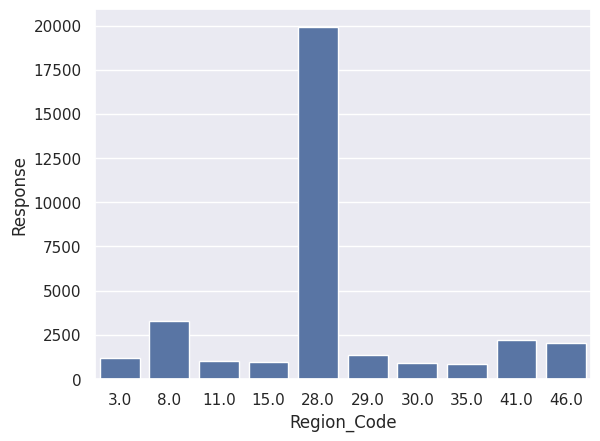

In [34]:
sns.barplot(data=top_regions,x='Region_Code',y='Response')

##### 2. What is/are the insight(s) found from the chart?

Region_code 28 has highest no. of interested people in vehicle insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By this visualization we can easily descide on which region to focus.

#### Chart - 10

In [35]:
# Chart - 10 visualization code

In [36]:
# Which age group of people are interested in vehicle insurance
Top_Age = df.groupby(df['Age'])['Response'].sum().sort_values(ascending=False).reset_index().head(10)
Top_Age

Age  Response
0   44      1811
1   43      1805
2   45      1775
3   46      1707
4   42      1651
5   41      1615
6   47      1607
7   40      1550
8   48      1500
9   39      1375

<Axes: xlabel='Age', ylabel='Response'>

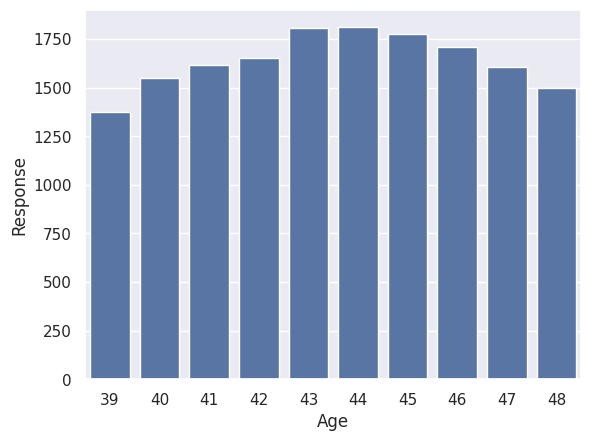

In [37]:
sns.barplot(data=Top_Age,x='Age',y='Response')

##### 1. Why did you pick the specific chart?

Barplot helps to compare values

##### 2. What is/are the insight(s) found from the chart?

People of age 44 are most interesed in vehicle insurance followed by people of age 43, 45,46. We can conclude that people in their 40's are more tend to buy vehicle insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can conclude that people in their 40's are more tend to buy vehicle insurance.

#### Chart - 11

In [38]:
# Chart - 11 visualization code

In [39]:
# Which gender is more interested in vehicle insurance
gender_resp = df.groupby(df['Gender'])['Response'].sum().reset_index()
gender_resp

Gender  Response
0  Female     18185
1    Male     28525

<Axes: xlabel='Gender', ylabel='Response'>

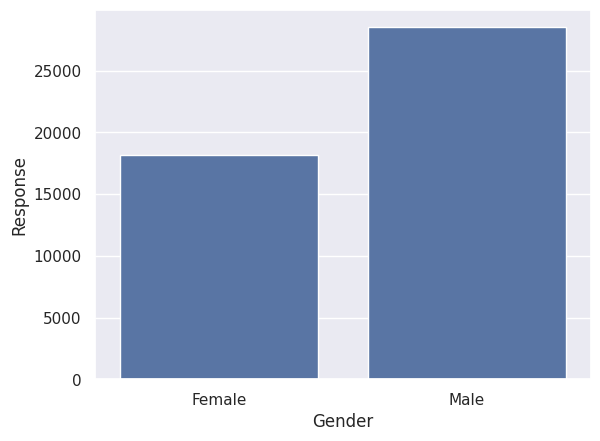

In [40]:
sns.barplot(data=gender_resp,x='Gender',y='Response')

##### 1. Why did you pick the specific chart?

With barplot we can see comparison more accurately

##### 2. What is/are the insight(s) found from the chart?

Males are more iterested to buy vehicle insurance compared to female

#### Chart - 12

In [41]:
# Chart - 12 visualization code
df.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0    Male   44                1         28.0                   0   > 2 Years   
1    Male   76                1          3.0                   0    1-2 Year   
2    Male   47                1         28.0                   0   > 2 Years   
3    Male   21                1         11.0                   1    < 1 Year   
4  Female   29                1         41.0                   1    < 1 Year   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0            Yes         40454.0                  26.0      217         1  
1             No         33536.0                  26.0      183         0  
2            Yes         38294.0                  26.0       27         1  
3             No         28619.0                 152.0      203         0  
4             No         27496.0                 152.0       39         0

In [42]:
# Vehicle age and interested people:
vehicl_age_wise_intereset = df.groupby(df['Vehicle_Age'])['Response'].sum().reset_index()
vehicl_age_wise_intereset

Vehicle_Age  Response
0    1-2 Year     34806
1    < 1 Year      7202
2   > 2 Years      4702

<Axes: xlabel='Vehicle_Age', ylabel='Response'>

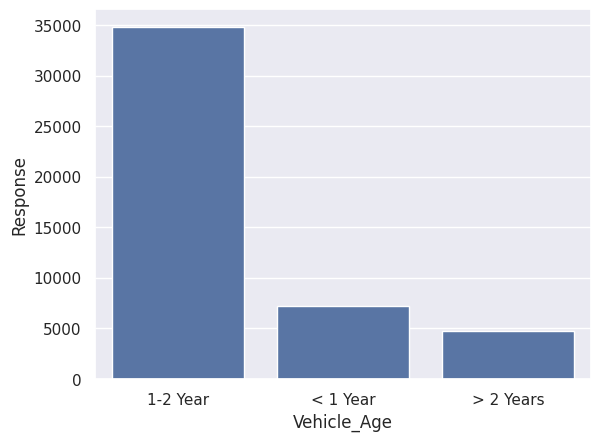

In [43]:
sns.barplot(data=vehicl_age_wise_intereset,x='Vehicle_Age',y='Response')

##### 2. What is/are the insight(s) found from the chart?

People whose vehicle age is between 1-2 year are more interested in vehicle insurance

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [44]:
# Chart - 13 visualization code
df.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0    Male   44                1         28.0                   0   > 2 Years   
1    Male   76                1          3.0                   0    1-2 Year   
2    Male   47                1         28.0                   0   > 2 Years   
3    Male   21                1         11.0                   1    < 1 Year   
4  Female   29                1         41.0                   1    < 1 Year   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0            Yes         40454.0                  26.0      217         1  
1             No         33536.0                  26.0      183         0  
2            Yes         38294.0                  26.0       27         1  
3             No         28619.0                 152.0      203         0  
4             No         27496.0                 152.0       39         0

In [45]:
# Interested people and their vehicle damage:
damage_vehicel_response = df.groupby(df['Vehicle_Damage'])['Response'].sum().reset_index()
damage_vehicel_response

Vehicle_Damage  Response
0             No       982
1            Yes     45728

<Axes: xlabel='Vehicle_Damage', ylabel='Response'>

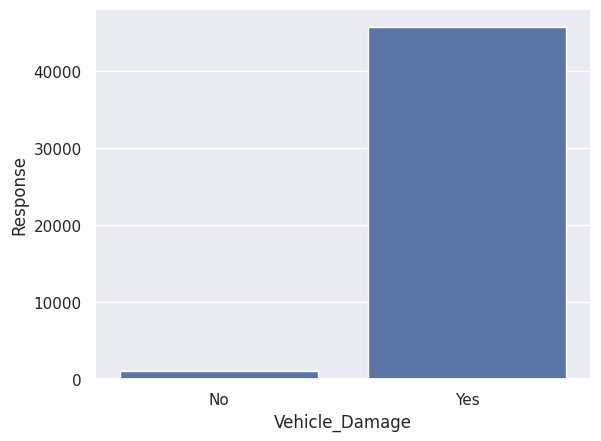

In [46]:
sns.barplot(data=damage_vehicel_response,x='Vehicle_Damage',y='Response')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<ipython-input-47-8a75e2ba0f7a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

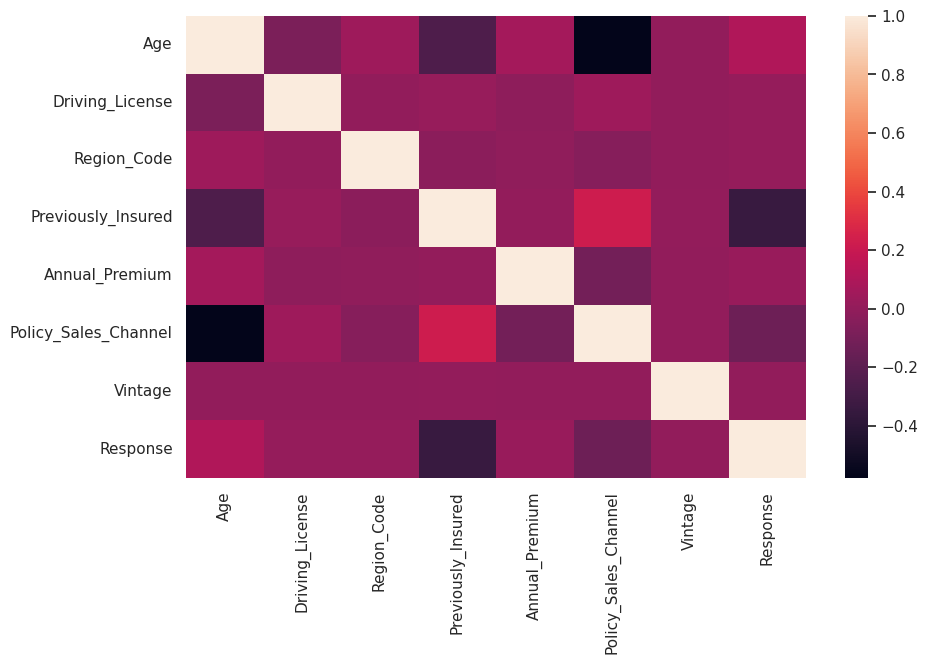

In [47]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())

#### Chart - 15 - Pair Plot

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

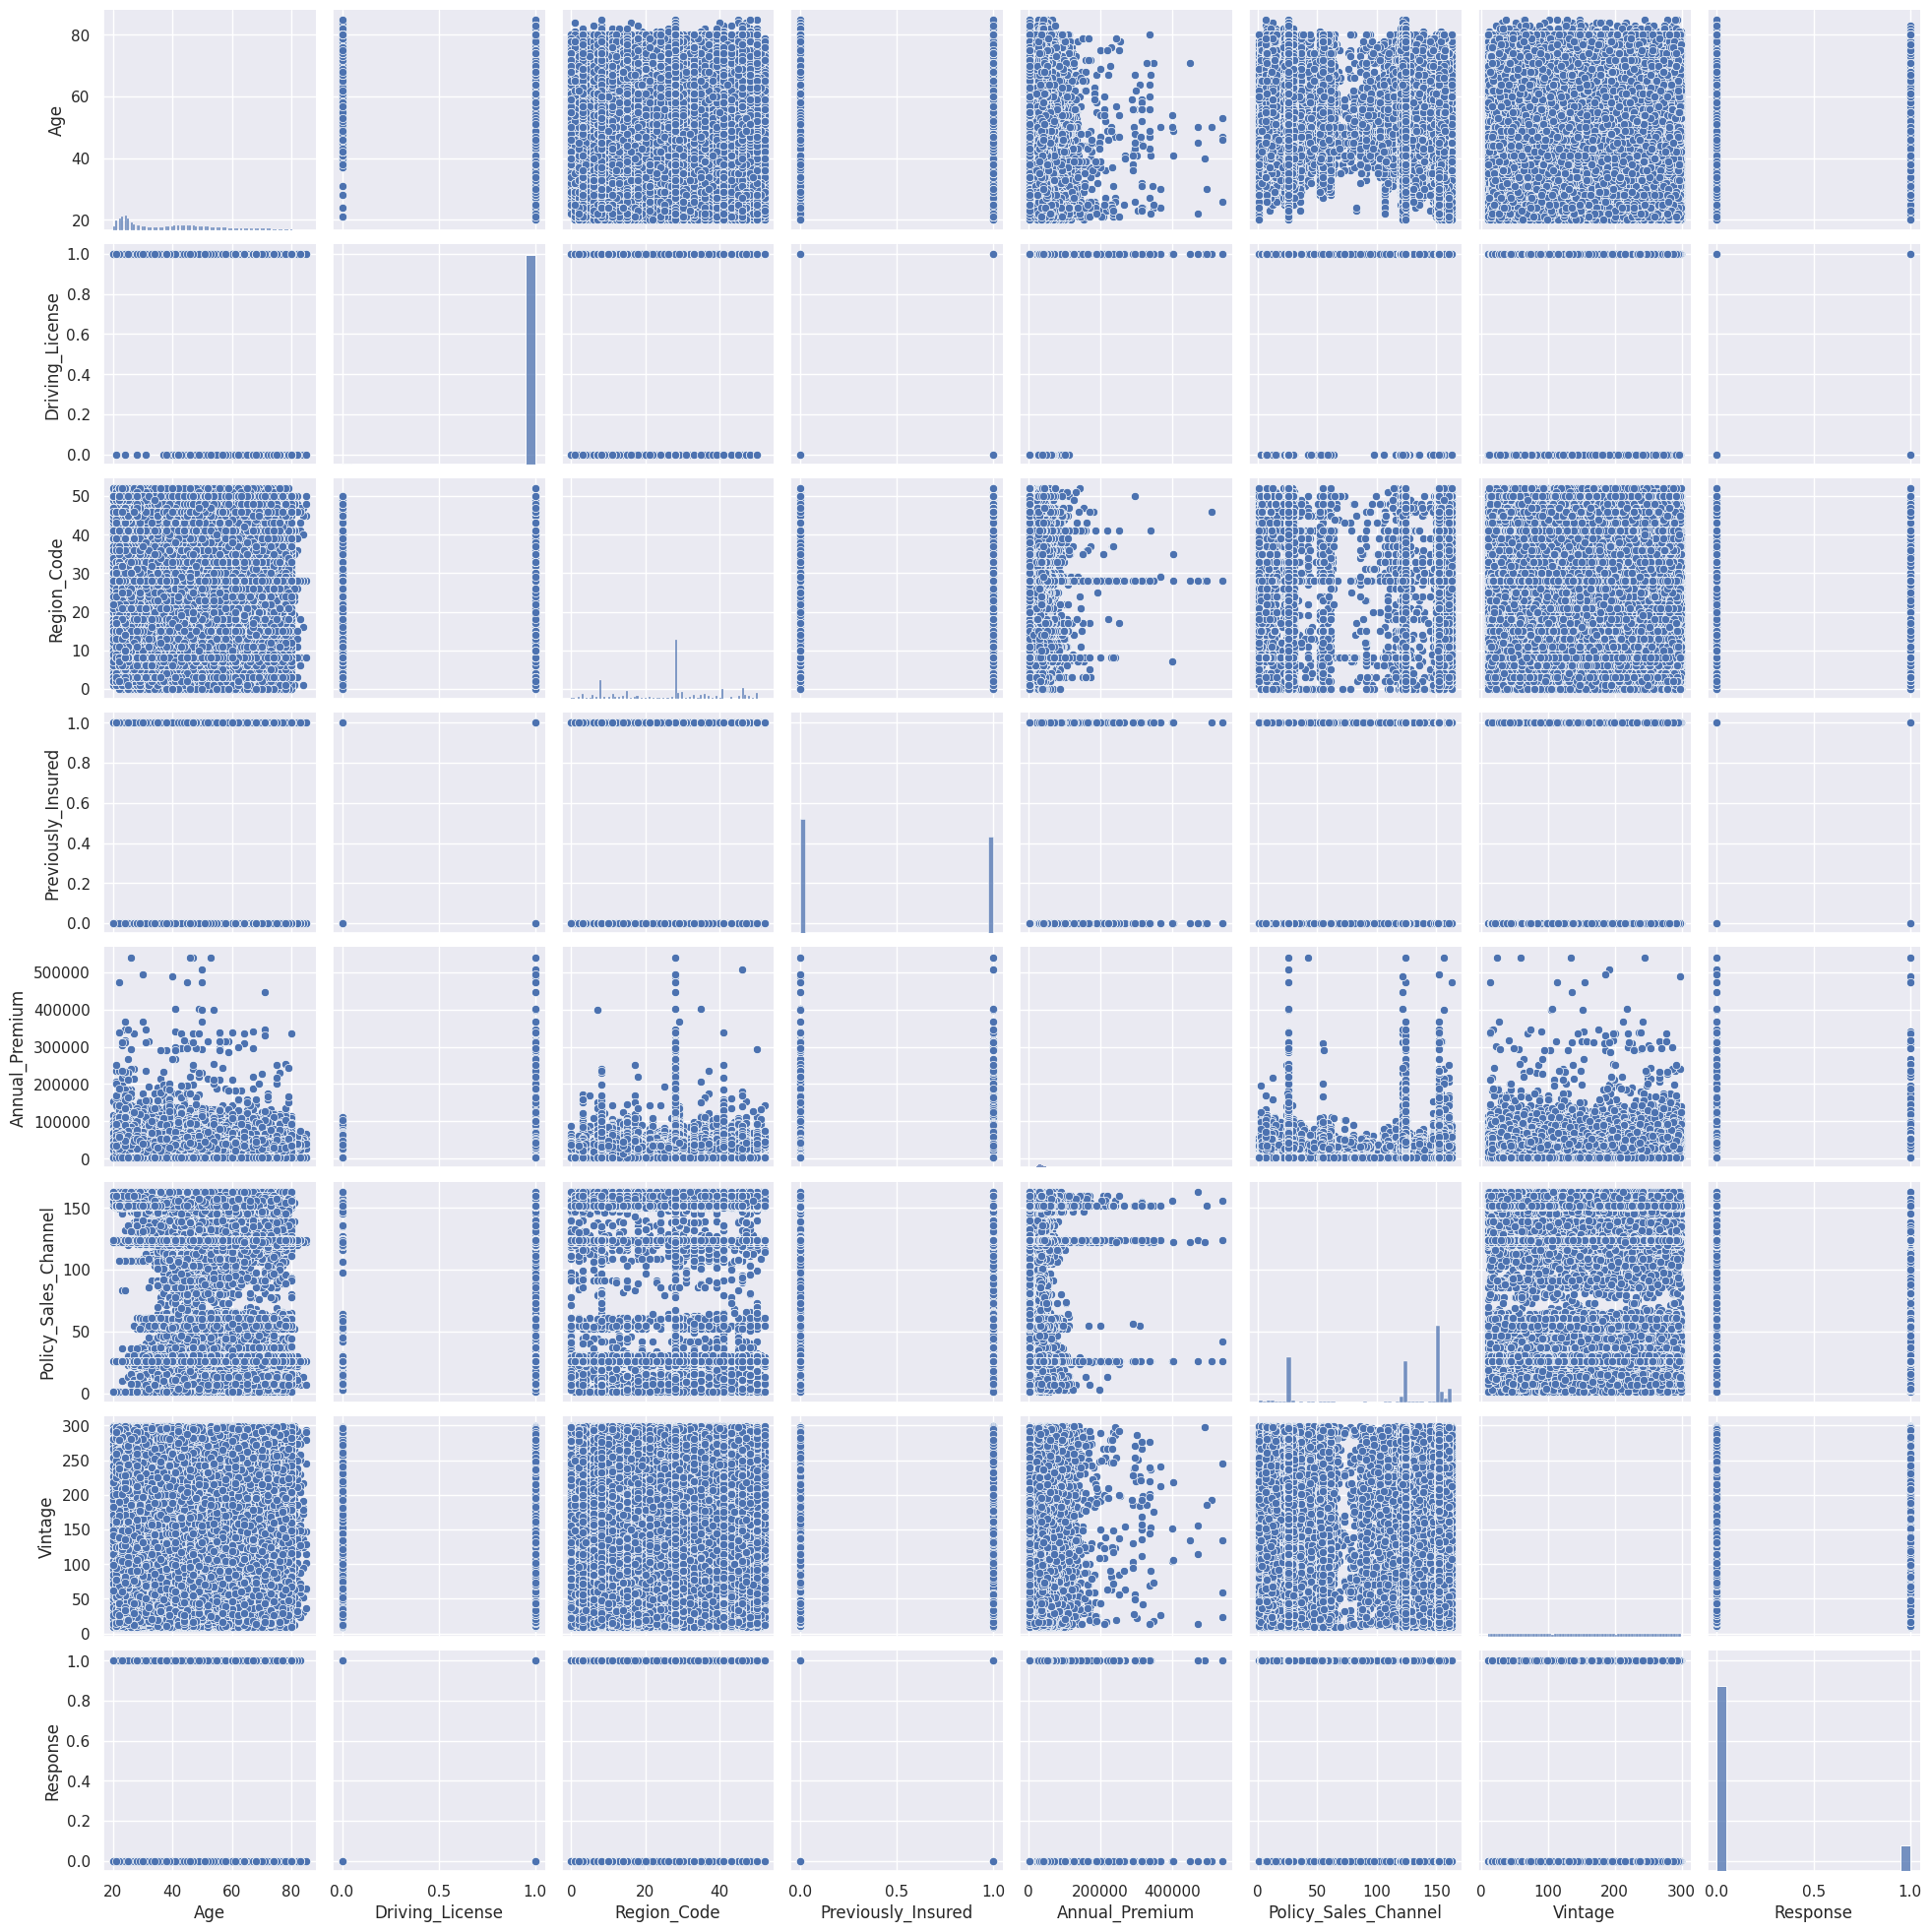

In [48]:
# Pair Plot visualization code
sns.pairplot(df,palette='viridis')

#### Chart - 16

In [49]:
df['Policy_Sales_Channel'].unique()

array([ 26., 152., 160., 124.,  14.,  13.,  30., 156., 163., 157., 122.,
        19.,  22.,  15., 154.,  16.,  52., 155.,  11., 151., 125.,  25.,
        61.,   1.,  86.,  31., 150.,  23.,  60.,  21., 121.,   3., 139.,
        12.,  29.,  55.,   7.,  47., 127., 153.,  78., 158.,  89.,  32.,
         8.,  10., 120.,  65.,   4.,  42.,  83., 136.,  24.,  18.,  56.,
        48., 106.,  54.,  93., 116.,  91.,  45.,   9., 145., 147.,  44.,
       109.,  37., 140., 107., 128., 131., 114., 118., 159., 119., 105.,
       135.,  62., 138., 129.,  88.,  92., 111., 113.,  73.,  36.,  28.,
        35.,  59.,  53., 148., 133., 108.,  64.,  39.,  94., 132.,  46.,
        81., 103.,  90.,  51.,  27., 146.,  63.,  96.,  40.,  66., 100.,
        95., 123.,  98.,  75.,  69., 130., 134.,  49.,  97.,  38.,  17.,
       110.,  80.,  71., 117.,  58.,  20.,  76., 104.,  87.,  84., 137.,
       126.,  68.,  67., 101., 115.,  57.,  82.,  79., 112.,  99.,  70.,
         2.,  34.,  33.,  74., 102., 149.,  43.,   

In [50]:
# Which Policy_Sales_Channel has highest positive response:
channel_resp = df.groupby(df['Policy_Sales_Channel'])['Response'].sum().sort_values(ascending=False).reset_index().head(10)
channel_resp

Policy_Sales_Channel  Response
0                  26.0     15891
1                 124.0     13996
2                 152.0      3858
3                 156.0      2297
4                 157.0      1794
5                 122.0      1720
6                 154.0      1474
7                 163.0       880
8                 160.0       475
9                 155.0       395

<Axes: xlabel='Policy_Sales_Channel', ylabel='Response'>

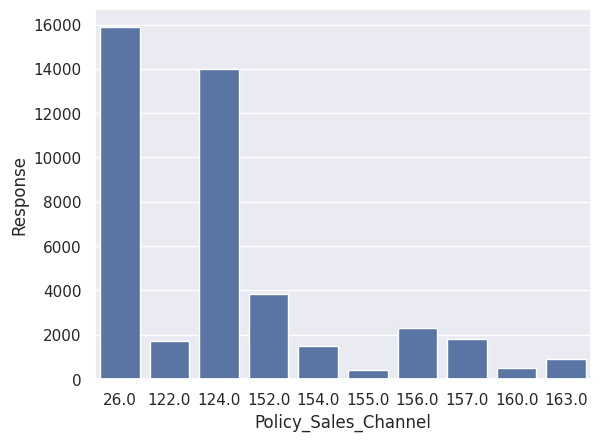

In [51]:
sns.barplot(data=channel_resp,x='Policy_Sales_Channel',y='Response')

##### 2. What is/are the insight(s) found from the chart?

Policy_Sales_Channel 26.0 has the highest no. of people who are interested in vehicle insurance followed by channel 124.0,152.0 and others

#### Chart - 17

In [52]:
# Visualization 17:
# Scatterplot:
# Annual_premium according to age with their response.
import plotly.express as px
px.scatter(df,x='Annual_Premium',y='Age',color='Response')

## ***5. EDA***

In [53]:
df.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0    Male   44                1         28.0                   0   > 2 Years   
1    Male   76                1          3.0                   0    1-2 Year   
2    Male   47                1         28.0                   0   > 2 Years   
3    Male   21                1         11.0                   1    < 1 Year   
4  Female   29                1         41.0                   1    < 1 Year   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0            Yes         40454.0                  26.0      217         1  
1             No         33536.0                  26.0      183         0  
2            Yes         38294.0                  26.0       27         1  
3             No         28619.0                 152.0      203         0  
4             No         27496.0                 152.0       39         0

In [54]:
# Gender column unique values:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [55]:
# Previously_Insured column unique values:
df['Previously_Insured'].unique()

array([0, 1])

In [56]:
# Applying onehotencoding on gender , vehicle_damage column.
from sklearn.preprocessing import OneHotEncoder
le = OneHotEncoder(drop='first',sparse=False,dtype='int')
df[['Gender','Vehicle_Damage']] = le.fit_transform(df[['Gender','Vehicle_Damage']])
df['Gender'].unique()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



array([1, 0])

In [57]:
# Applying labelencoder on vehicle age column:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Vehicle_Age']=le.fit_transform(df['Vehicle_Age'])
df["Vehicle_Age"].unique()

array([2, 0, 1])

In [58]:
# Sucessfully applied onehotencoding and labelencoding:
df.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0       1   44                1         28.0                   0            2   
1       1   76                1          3.0                   0            0   
2       1   47                1         28.0                   0            2   
3       1   21                1         11.0                   1            1   
4       0   29                1         41.0                   1            1   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0               1         40454.0                  26.0      217         1  
1               0         33536.0                  26.0      183         0  
2               1         38294.0                  26.0       27         1  
3               0         28619.0                 152.0      203         0  
4               0         27496.0                 152.0       39         0

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  int64  
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  int64  
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 32.0 MB


In [60]:
# Splitting data in training and testing data:
from sklearn.model_selection import train_test_split
x = df.drop(columns='Response')
y = df['Response']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [61]:
# Converting x_train in int:
x_train.astype('int64')

Gender  Age  Driving_License  Region_Code  Previously_Insured  \
332803       0   39                1           15                   0   
116248       1   38                1           11                   0   
255005       1   22                1           30                   1   
317474       0   23                1           41                   1   
344212       1   56                1           48                   0   
...        ...  ...              ...          ...                 ...   
259178       0   24                1           36                   1   
365838       1   56                1           35                   0   
131932       0   22                1            2                   0   
146867       1   44                1           32                   1   
121958       0   27                1           37                   0   

        Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
332803            0               1           52906                    55   
116248            0               1           23038                    26   
255005            1               0           45318                   152   
317474            1               0           29132                   151   
344212            2               1            2630                   154   
...             ...             ...             ...                   ...   
259178            1               0           22575                   152   
365838            0               1           41287                   124   
131932            1               1           18857                   152   
146867            0               1            2630                   156   
121958            1               1           24741                   152   

        Vintage  
332803      227  
116248       29  
255005      166  
317474      277  
344212      155  
...         ...  
259178      287  
365838      298  
131932       76  
146867       51  
121958      127  

[304887 rows x 10 columns]

## **Feature Selection**

[0.00485065 0.1458784  0.0004719  0.10578231 0.05823825 0.01569733
 0.07204785 0.24767647 0.07130062 0.27805623]


<Axes: >

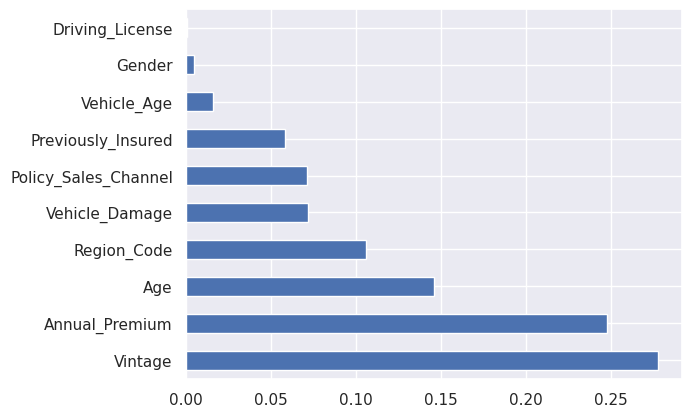

In [62]:
# Feature Selection using ExtraClassifier:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x,y)
print(etc.feature_importances_) # In built class feature_importances_
feature_impo = pd.Series(etc.feature_importances_,index=x.columns)
feature_impo.nlargest(11).plot(kind='barh')

In [63]:
# Dropping less effective column
x.drop(columns='Driving_License',inplace=True)

In [64]:
# Checking if data is skewed:
df.skew()

Gender                  -0.163590
Age                      0.672539
Driving_License        -21.595182
Region_Code             -0.115266
Previously_Insured       0.167747
Vehicle_Age              0.589682
Vehicle_Damage          -0.019507
Annual_Premium           1.766087
Policy_Sales_Channel    -0.900008
Vintage                  0.003030
Response                 2.301906
dtype: float64

<Axes: xlabel='Response', ylabel='count'>

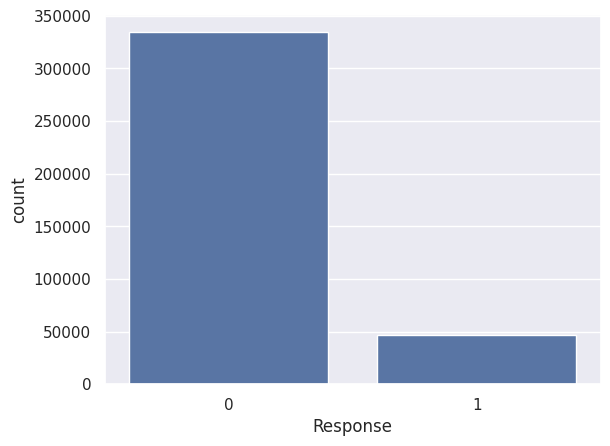

In [65]:
# Checking if response class is balanced or not:
sns.countplot(data=df ,x='Response')

In [66]:
# Data is imbalanced.

In [67]:
# Handeling imbalanced data using RandomOverSampler:
from imblearn.over_sampling import RandomOverSampler
randomsample = RandomOverSampler()
x_new, y_new=randomsample.fit_resample(x,y)


<Axes: xlabel='Response', ylabel='count'>

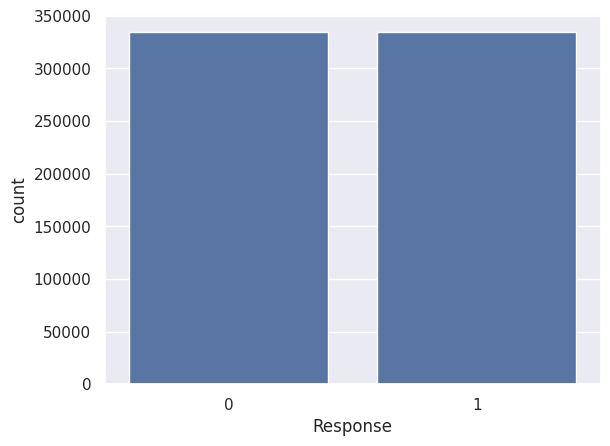

In [68]:
# Checking:
sns.countplot(data=df,x=y_new)

In [69]:
# Data scaling usining standard scaler:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
x_train = std_scale.fit_transform(x_train)
x_test = std_scale.transform(x_test)

## ***7. ML Model Implementation***

### ML Model - 1

In [70]:
# ML Model - 1 Implementation:
# Logistic Regression:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Fit the Algorithm
lr.fit(x_train,y_train)

# Predict on the model
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)


In [71]:
# Function for calculating all metrics:
from sklearn.metrics import accuracy_score,precision_score,classification_report,confusion_matrix
def evaluate(y_train,y_test,y_pred_train,y_pred_test):
  print("accuracy score on training data : ", accuracy_score(y_train,y_pred_train))
  print("*"*50)
  print("acuracy score on test data : ", accuracy_score(y_test,y_pred_test))
  print("*"*50)
  print("Precision score on train data : ", precision_score(y_train,y_pred_train))
  print("*"*50)
  print("Precision score on test data : ", precision_score(y_test,y_pred_test))
  print("*"*50)
  classification_repo = classification_report(y_test,y_pred_test)
  print("classification report on train data :\n ", classification_repo)
  print("*"*50)
  confusion_mat = confusion_matrix(y_test,y_pred_test)
  print("Confusion matrix : ", confusion_mat)
  print("*"*50)

In [72]:
# Evaluation metrics:
evaluate(y_train,y_test,y_pred_train,y_pred_test)

accuracy score on training data :  0.8780302210327104
**************************************************
acuracy score on test data :  0.8750623179659416
**************************************************
Precision score on train data :  0.5
**************************************************
Precision score on test data :  0.0
**************************************************
classification report on train data :
                precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222

**************************************************
Confusion matrix :  [[66699     0]
 [ 9523     0]]
**************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control t

### ML Model - 2

In [73]:
# Model 2
# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=42,min_samples_split=5,min_samples_leaf=2,n_jobs=-1)

#Fitting model:
rfc.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, n_jobs=-1,
                       random_state=42)

In [74]:
# Predicting x_train and x_test:
rfc_y_pred_train = rfc.predict(x_train)
rfc_y_pred_test = rfc.predict(x_test)

In [75]:
# Evaluation metrics:
evaluate(y_train,y_test,rfc_y_pred_train,rfc_y_pred_test)

accuracy score on training data :  0.9505259325586201
**************************************************
acuracy score on test data :  0.8715856314449897
**************************************************
Precision score on train data :  0.9968082715216903
**************************************************
Precision score on test data :  0.41915802318486883
**************************************************
classification report on train data :
                precision    recall  f1-score   support

           0       0.88      0.99      0.93     66699
           1       0.42      0.07      0.12      9523

    accuracy                           0.87     76222
   macro avg       0.65      0.53      0.53     76222
weighted avg       0.82      0.87      0.83     76222

**************************************************
Confusion matrix :  [[65747   952]
 [ 8836   687]]
**************************************************


### ML Model - 3

In [76]:
# ML Model - 3 Implementation
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.3, n_estimators=150, max_depth=7,random_state=0)

# Fit the Algorithm
xgb.fit(x_train,y_train)

# Predict on the model
xgb_y_pred_train = xgb.predict(x_train)
xgb_y_pred_test = xgb.predict(x_test)

In [77]:
# Evaluation metrics:
evaluate(y_train,y_test,xgb_y_pred_train,xgb_y_pred_test)

accuracy score on training data :  0.8879322503091309
**************************************************
acuracy score on test data :  0.8732386974889139
**************************************************
Precision score on train data :  0.8132392612575223
**************************************************
Precision score on test data :  0.4324586977648202
**************************************************
classification report on train data :
                precision    recall  f1-score   support

           0       0.88      0.99      0.93     66699
           1       0.43      0.05      0.08      9523

    accuracy                           0.87     76222
   macro avg       0.66      0.52      0.51     76222
weighted avg       0.82      0.87      0.83     76222

**************************************************
Confusion matrix :  [[66115   584]
 [ 9078   445]]
**************************************************


### Evaluation:

In [78]:
# Creating dictionary with data of models and their accuracy details:
evaluation_dict = {'Models':['LogisticRegression','RandomForestClassifier','XGBClassifier'],
                   'Training_accuracy':[0.87,0.95,0.88],
                   'Test_accuracy':[0.87,0.87,0.87]
                   }

In [79]:
# Creating dataframe of evaluation dictionary:
results = pd.DataFrame(evaluation_dict)
results

Models  Training_accuracy  Test_accuracy
0      LogisticRegression               0.87           0.87
1  RandomForestClassifier               0.95           0.87
2           XGBClassifier               0.88           0.87

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Logistic Regression have given training accuracy and test accuracy of 87% whereas RandomForestClassifier has given training accuracy of 99% and test accuracy of 86%. XGBClassifier has given training accuraacy of 88% and test accuracy as 87 %.

Here, we will choose **LogisticRegression** as it has stable/balanced accuracy on both training data and testing data and logistic regression is less complex and do not have overfitting problem:

Logistic Regression:

    Pros:
  Interpretable and easy to understand.

  Computationally efficient.

  Less prone to overfitting.

    Cons:
May not capture complex non-linear relationships as effectively as ensemble methods.

# **Conclusion**

Most people are not interested in vehicle insurance.(Company can give increased benefits to lure more customers)

males are interested in insurance than females.

people in their 40's are most interested in vehicle insurance,

people with vehicle age 1-2 years are interested,

people having damaged vehicle are interested in insurance,

customers who are not previously insured are interested,

People of region_code 28.0 are most interested in insurance,

Features like Vintage, Annual_Premium and Age are affecting target column the most.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***